### Taller 3 analítica computacional

- **Nicolas Alvarez Ortiz**
- **Tomas Benavides**

In [8]:
#Punto 2
# literal (a)
import pandas as pd 
data = pd.read_csv("real_estate_valuation_data_set.csv", index_col=0)

In [9]:
data.shape

(414, 7)

In [10]:
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Descripción de las variables
- **X1**: Fecha de la transacción 
- **X2**: Edad de la casa
- **X3**: Distancia a la estación MRT más cercana
- ***X4**: Número de tiendas de conveniencia cercanas
- **X5**: Longitud
- **X6**: Latitud

- **Y**: Precio de la casa de unidad de área

### Estadísticas descriptivas

In [11]:
data.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [7]:
import seaborn as sns
%matplotlib inline

### Histogramas por cada variable y dispersión entre variables

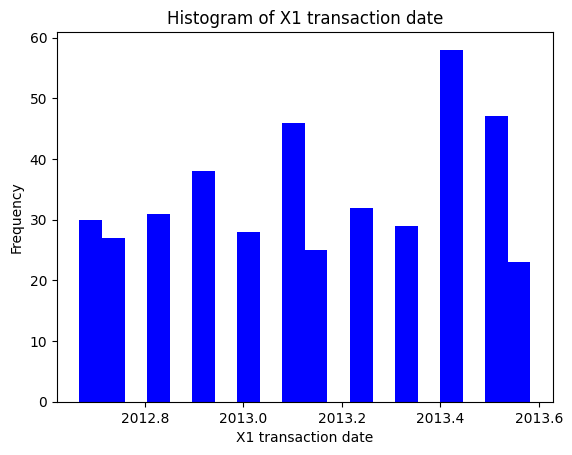

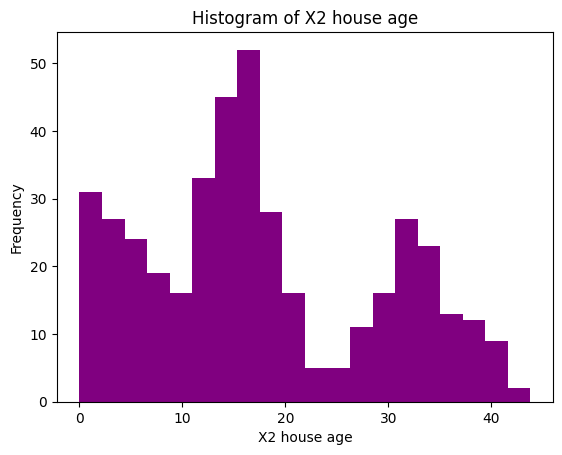

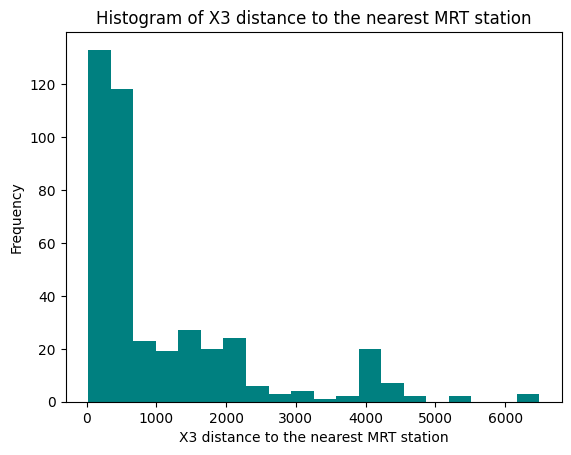

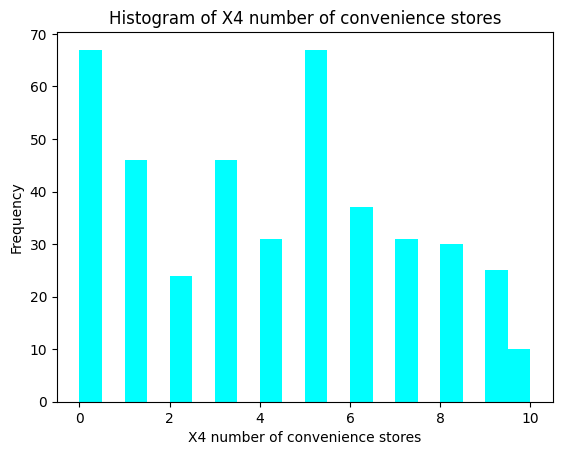

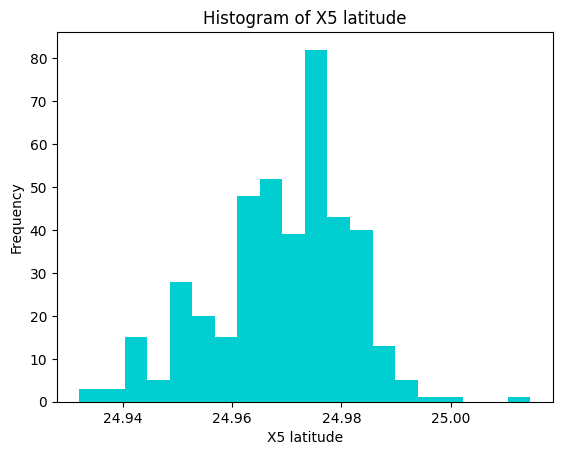

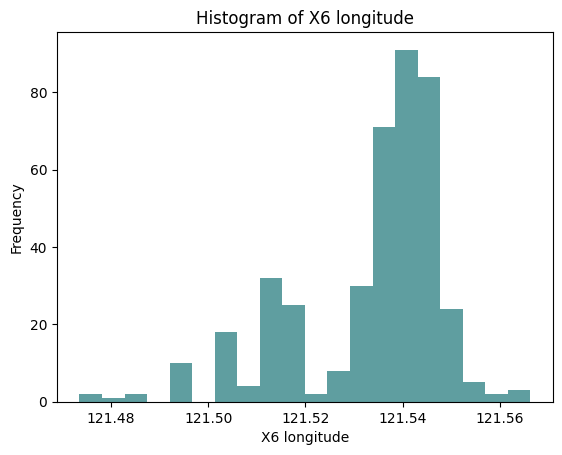

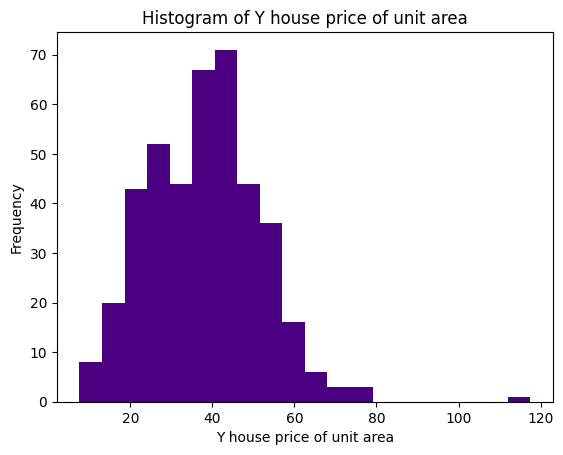

In [26]:
import matplotlib.pyplot as plt 
#Definir colores para los histogramas
colors = ["blue","purple","teal","aqua","darkturquoise","cadetblue","indigo"]
#Realizar histograms por cada columnaaaa
for i, column in enumerate(data.columns):
    plt.hist(data[column], bins=20, color=colors[i % len(colors)])  
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

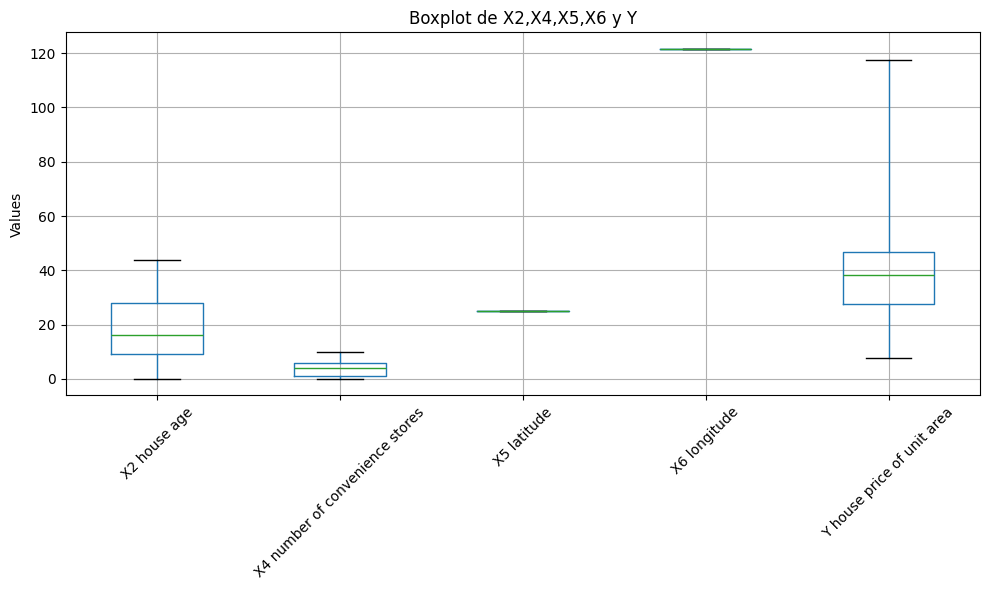

In [81]:
columns_to_include = data.columns[(data.columns != 'X3 distance to the nearest MRT station') & (data.columns != 'X1 transaction date')]
data[columns_to_include].boxplot(figsize=(10,6),whis = 10)
plt.title('Boxplot de X2,X4,X5,X6 y Y')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

X1 transaction date                      -0.041082
X2 house age                             -0.048520
X3 distance to the nearest MRT station   -0.806317
X4 number of convenience stores           0.449099
X5 latitude                               0.412924
X6 longitude                              1.000000
Y house price of unit area                0.523287
dtype: float64


<Axes: >

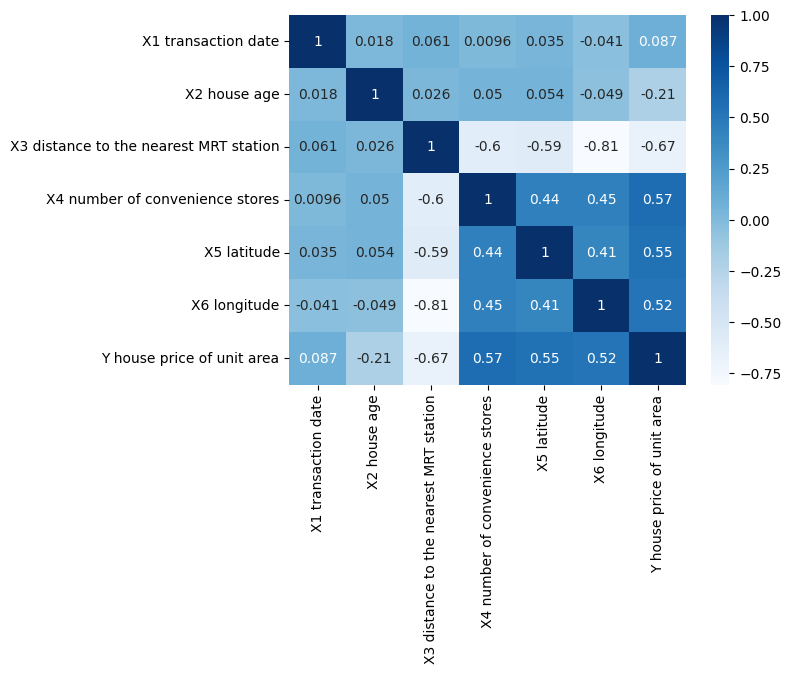

In [69]:
#Correlaciones de las características con la variable de respuesta (Y):
correlaciones = data.corrwith(data['Y house price of unit area'])
#print(correlaciones)
co_X1 = data.corrwith(data["X6 longitude"])
print(co_X1)
#Matriz de correlación
#Punto 2b
import seaborn as sb
corr = data.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

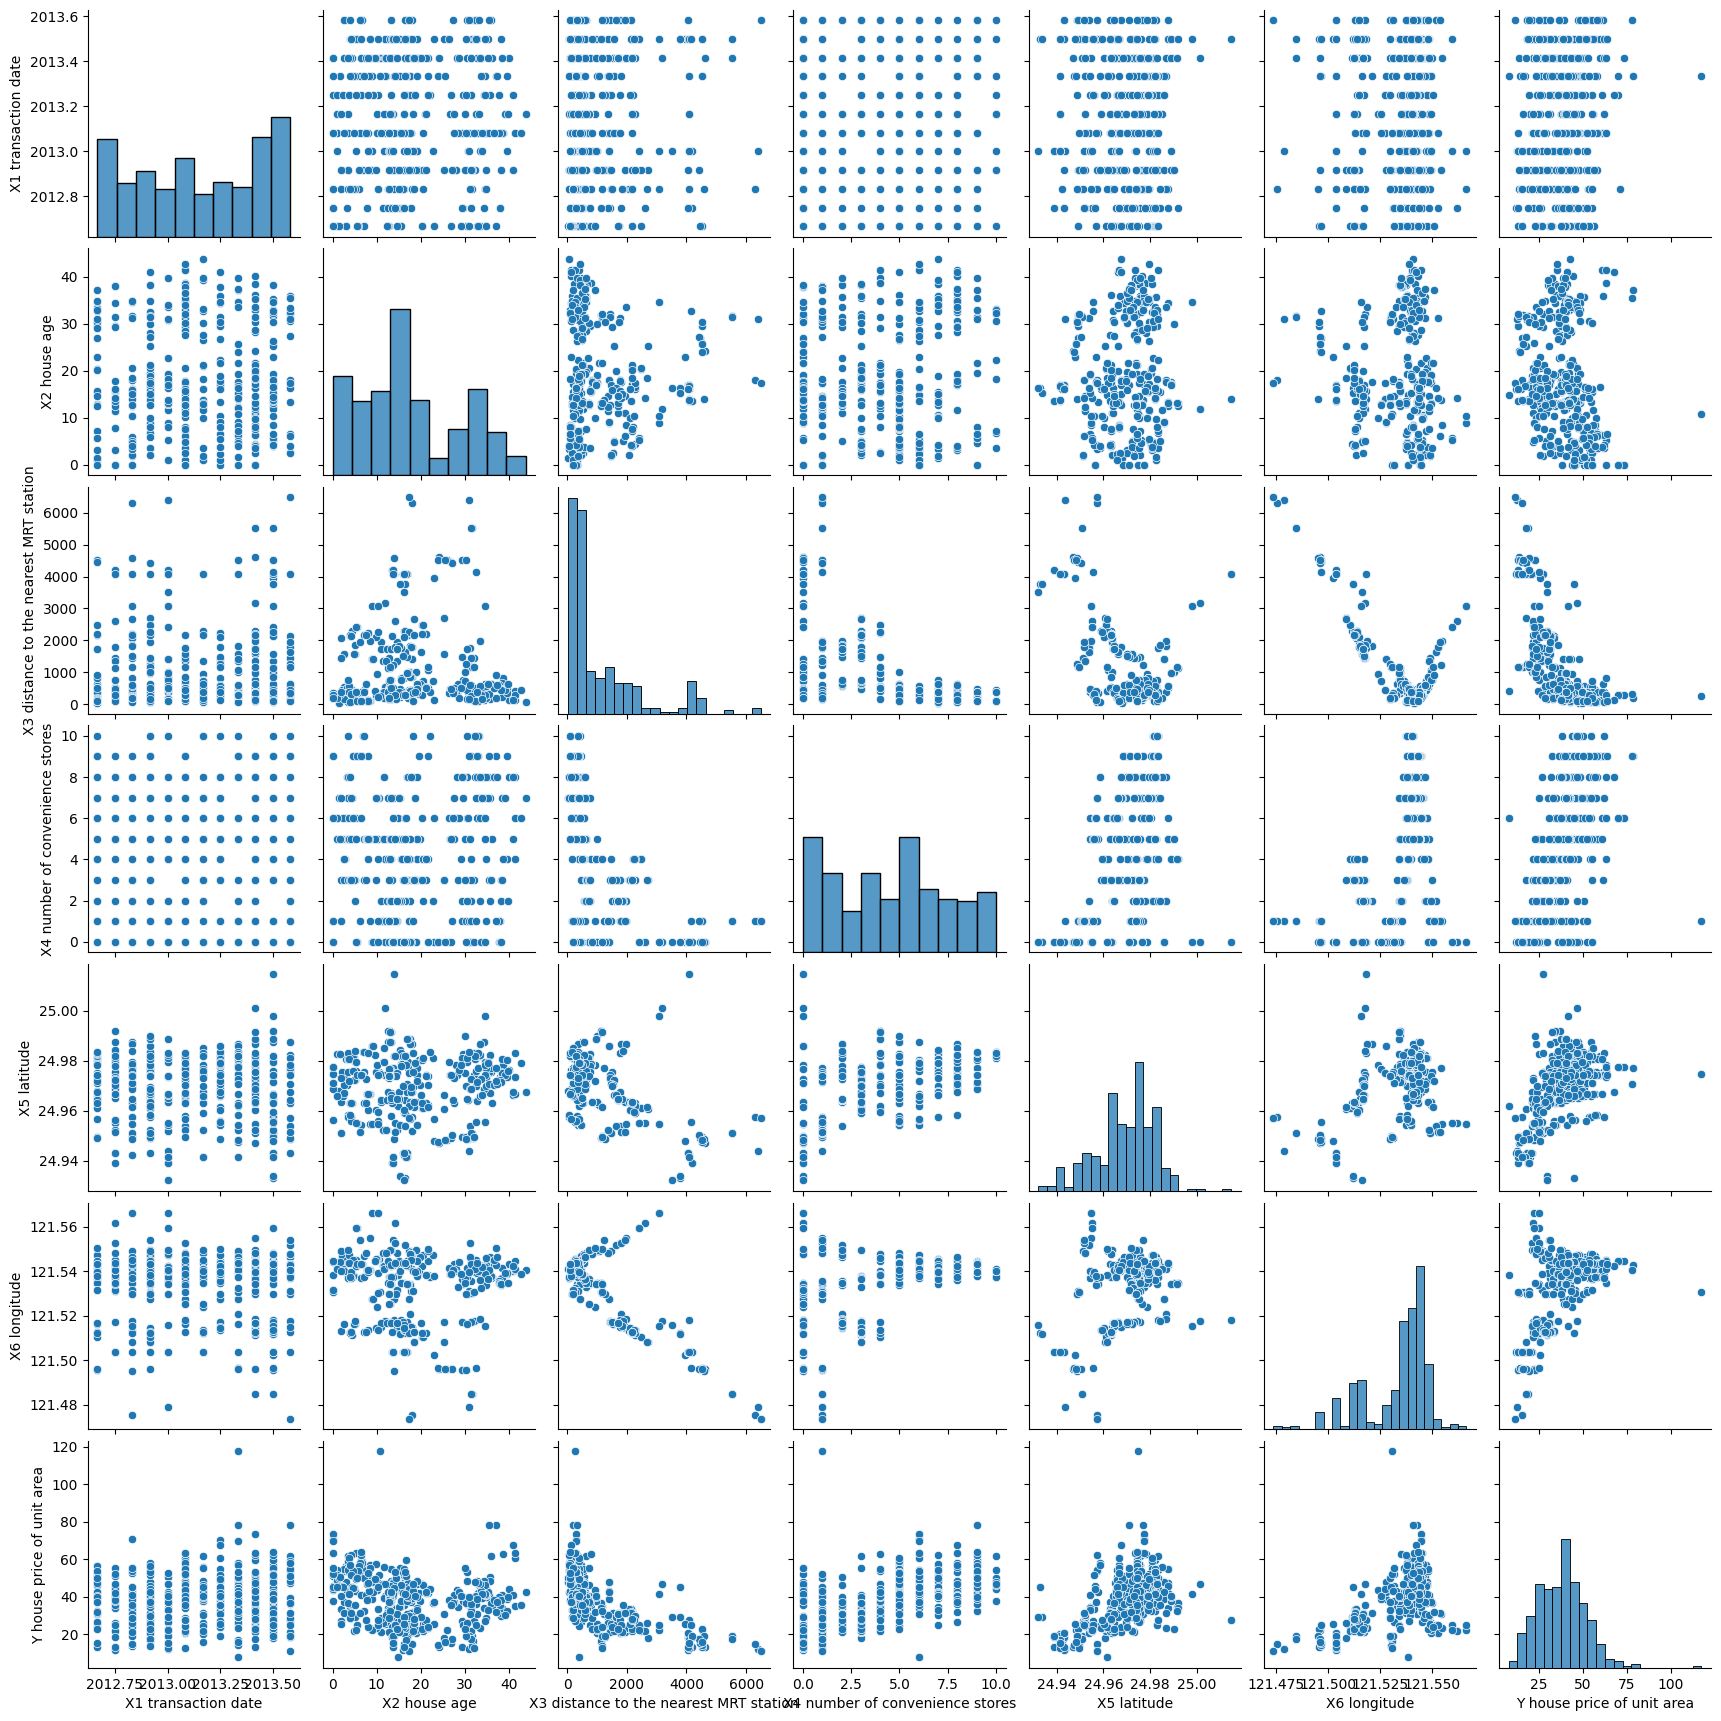

In [12]:
#Punto 2 c
sns.pairplot(data,)

<Axes: >

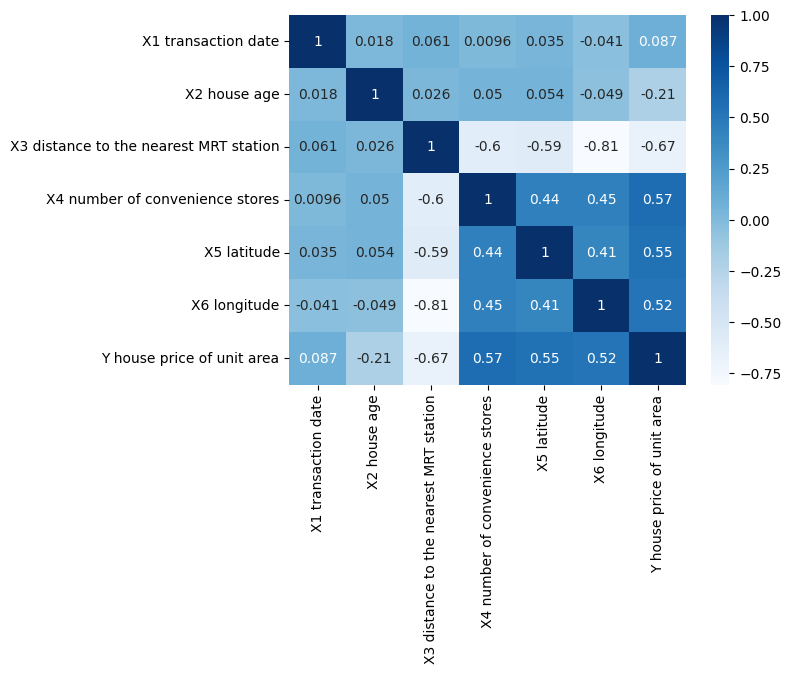

In [36]:
#Matriz de correlación
#Punto 2b
import seaborn as sb
corr = data.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

### Diagramas de dispersión y tendencia entre variables de entrada y variable de respuesta

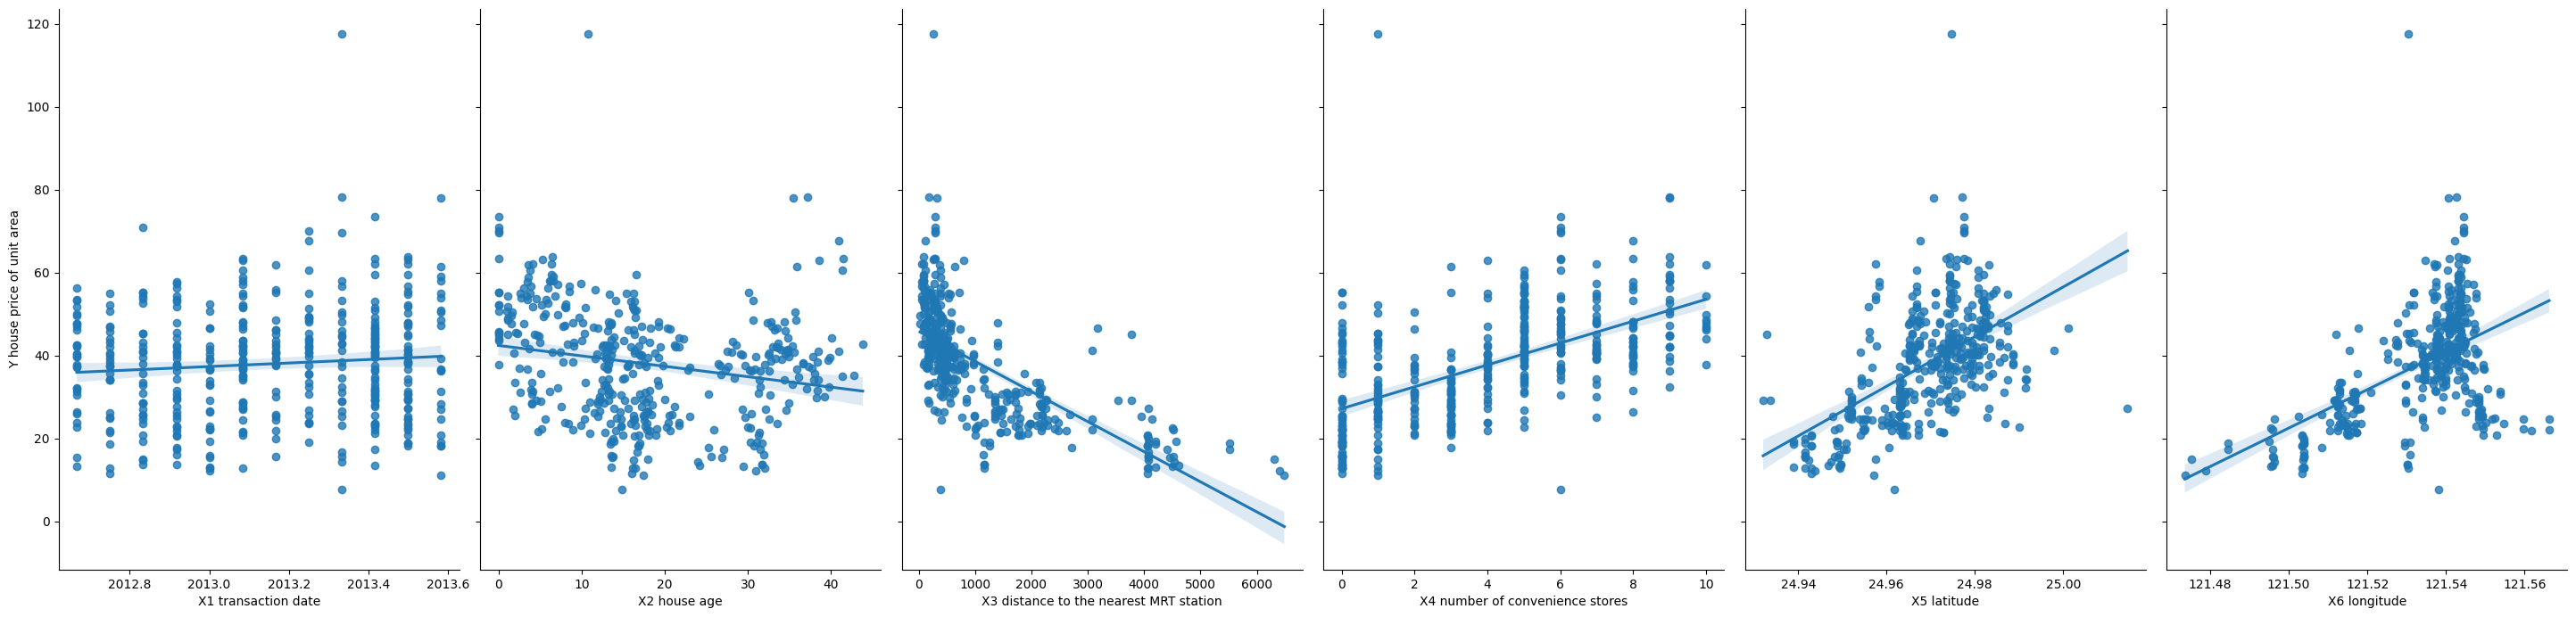

In [71]:
sns.pairplot(data, x_vars=['X1 transaction date','X2 house age','X3 distance to the nearest MRT station',"X4 number of convenience stores","X5 latitude","X6 longitude"], y_vars='Y house price of unit area', height=7, aspect=0.7, kind='reg')

### Modelo de regresión
$$
y = \beta_0 + \beta_1 \times X_1 + \beta_2 \times X_2 + \beta_3 \times X_3 + \beta_4 \times X_4 + \beta_5 \times X_5 + \beta_6 \times X_6
$$


In [66]:
# nombres de características
features = ['X1 transaction date','X2 house age','X3 distance to the nearest MRT station',"X4 number of convenience stores","X5 latitude","X6 longitude"]
# dataframe de características
X = data[features]
X.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
No,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024
2,2012.917,19.5,306.59470,9,24.98034,121.53951
3,2013.583,13.3,561.98450,5,24.98746,121.54391
4,2013.500,13.3,561.98450,5,24.98746,121.54391
5,2012.833,5.0,390.56840,5,24.97937,121.54245


In [41]:
# variable de respuesta
y = data['Y house price of unit area']
y.head()

No
1    37.9
2    42.2
3    47.3
4    54.8
5    43.1
Name: Y house price of unit area, dtype: float64

In [42]:
# tipos de X y y
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [43]:
#División entre entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [44]:
# tamaños 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(310, 6)
(310,)
(104, 6)
(104,)


In [45]:
print(X.head())
print(X_train.head())

    X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
No                                                                              
1              2012.917          32.0                                84.87882   
2              2012.917          19.5                               306.59470   
3              2013.583          13.3                               561.98450   
4              2013.500          13.3                               561.98450   
5              2012.833           5.0                               390.56840   

    X4 number of convenience stores  X5 latitude  X6 longitude  
No                                                              
1                                10     24.98298     121.54024  
2                                 9     24.98034     121.53951  
3                                 5     24.98746     121.54391  
4                                 5     24.98746     121.54391  
5                                 5     24

In [48]:
# cambiando el tamaño del conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [51]:
# sin reordenar los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle=False)

In [52]:
print(X.head())
print(X_train.head())

    X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
No                                                                              
1              2012.917          32.0                                84.87882   
2              2012.917          19.5                               306.59470   
3              2013.583          13.3                               561.98450   
4              2013.500          13.3                               561.98450   
5              2012.833           5.0                               390.56840   

    X4 number of convenience stores  X5 latitude  X6 longitude  
No                                                              
1                                10     24.98298     121.54024  
2                                 9     24.98034     121.53951  
3                                 5     24.98746     121.54391  
4                                 5     24.98746     121.54391  
5                                 5     24

In [53]:
# volviendo al caso en que cambia el tamaño del conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [54]:
from sklearn.linear_model import LinearRegression
# crear el objeto del modelo
linreg = LinearRegression()
# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_train, y_train)

LinearRegression()

In [56]:
# imprimir coeficientes
print(linreg.intercept_)
print(linreg.coef_)

# coeficientes con nombre de las características
list(zip(features, linreg.coef_))

-12796.117684899313
[ 5.71714218e+00 -2.49326467e-01 -4.93769843e-03  1.07614509e+00
  2.27037100e+02 -3.56988335e+01]


[('X1 transaction date', 5.717142183610284),
 ('X2 house age', -0.24932646689585305),
 ('X3 distance to the nearest MRT station', -0.004937698432022963),
 ('X4 number of convenience stores', 1.076145093445308),
 ('X5 latitude', 227.0371003711649),
 ('X6 longitude', -35.698833465050804)]

### Predicciones usando los datos de prueba :)

In [58]:
y_pred = linreg.predict(X_test)

### Evaluar el modelo usando las siguientes métricas
**Error absoluto medio**: 

$$\text{MAE} = \frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Error cuadrado medio**: 
$$\text{MSE} = \frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Raíz del Error cuadrado medio**: 
$$\text{RMSE} = \sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [60]:
from sklearn import metrics
import numpy as np 
# mean absolute error
MAE = metrics.mean_absolute_error(y_test, y_pred)
# mean squared error
MSE = metrics.mean_squared_error(y_test, y_pred)
# root mean squared error
RMSE = np.sqrt(MSE)

In [61]:
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  5.343030944663055
MSE:  45.01050719519454
RMSE:  6.708987046879323


### Usando Validación cruzada

In [62]:
from sklearn.model_selection import cross_val_score
# usar MSE - error cuadrático medio
scores = cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = - scores
print(mse_scores)

[ 49.89813853  89.0294996   57.865991   134.82397694  60.0535528 ]


In [63]:
# Calcular RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[ 7.06386145  9.43554448  7.6069699  11.61137274  7.74942274]


In [64]:
# RMSE promedio a través de todos los grupos
print(rmse_scores.mean())

8.693434260346574


In [68]:
import statsmodels.api as sm

features = ['X1 transaction date','X2 house age','X3 distance to the nearest MRT station',"X4 number of convenience stores","X5 latitude","X6 longitude"]
X = data[features]
y = data["Y house price of unit area"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# agregar constante explíticamente
X_train = sm.add_constant(X_train)
# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()
# resumen de resultados
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.543
Model:                                    OLS   Adj. R-squared:                  0.534
Method:                         Least Squares   F-statistic:                     60.00
Date:                        Wed, 07 Feb 2024   Prob (F-statistic):           1.05e-48
Time:                                19:11:07   Log-Likelihood:                -1129.0
No. Observations:                         310   AIC:                             2272.
Df Residuals:                             303   BIC:                             2298.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------